# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN

### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

### 1.3 Data examination

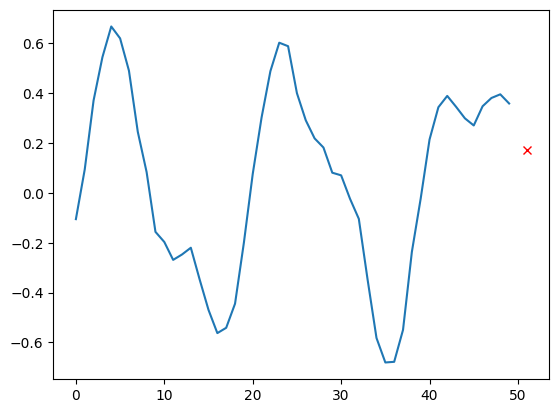

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [7]:
# Model definition
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [9]:
model_linear.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1479 - mean_squared_error: 0.1479 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0062 - val_mean_squared_error: 0.0062


In [11]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

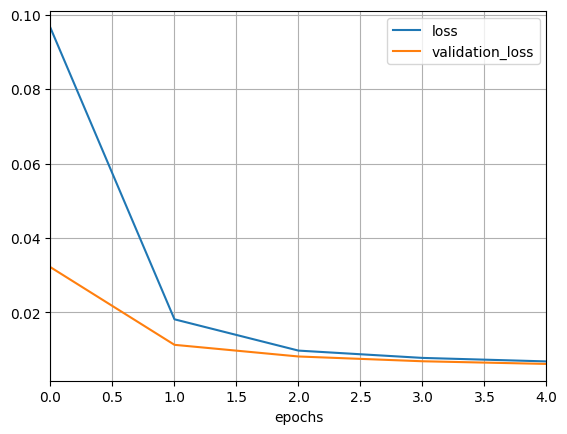

In [12]:
plot_function(history_linear)

In [13]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.006614950951188803
Test MSE:  0.006614950951188803


### 1.5 Simple RNN Model

In [14]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [16]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1234 - mean_squared_error: 0.1234 - val_loss: 0.0997 - val_mean_squared_error: 0.0997
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0940 - mean_squared_error: 0.0940 - val_loss: 0.0735 - val_mean_squared_error: 0.0735
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0679 - mean_squared_error: 0.0679 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0196 - val_mean_squared_error: 0.0196


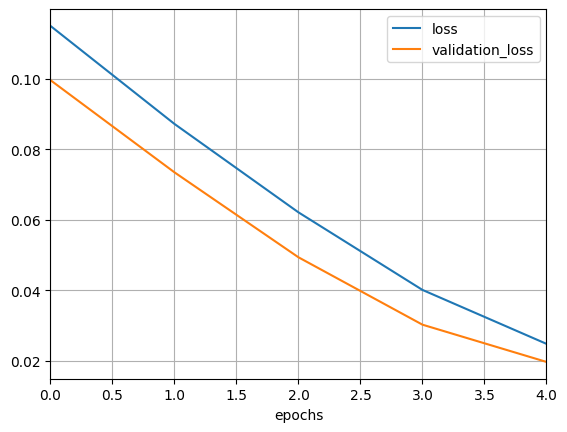

In [17]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [18]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [19]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [20]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.1580 - mean_squared_error: 0.1580 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0042 - val_mean_squared_error: 0.0042


In [21]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.004147145431488752
Test MSE:  0.004147145431488752


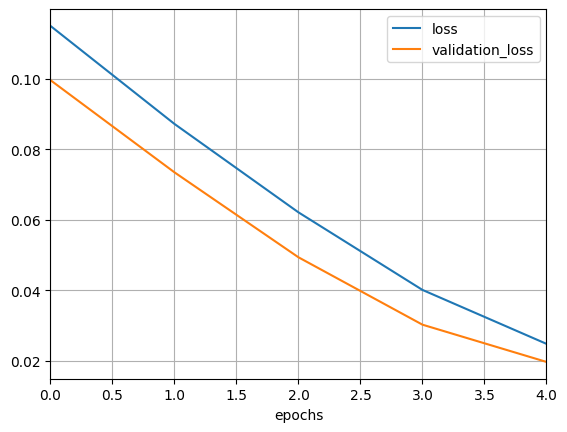

In [22]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [23]:
#from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 2.2 - Dataset examination

In [25]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [27]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [28]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [29]:
embed_size = 128
vocabulary_size = 100000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
optimizer = Adam(learning_rate=0.0005)  # Reduced learning rate for better convergence
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.5029 - loss: 0.7132 - val_accuracy: 0.4952 - val_loss: 0.7019
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.5063 - loss: 0.7021 - val_accuracy: 0.5062 - val_loss: 0.6969
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.5140 - loss: 0.6941 - val_accuracy: 0.4938 - val_loss: 0.7083
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5993 - loss: 0.6575 - val_accuracy: 0.5608 - val_loss: 0.6772
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7346 - loss: 0.5110 - val_accuracy: 0.6546 - val_loss: 0.6250


In [32]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.6408759951591492
Test accuracy:  64.30000066757202 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

Loading IMDB dataset...

=== Training SimpleRNN model ===
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4946 - loss: 0.7040 - val_accuracy: 0.4980 - val_loss: 0.6938
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5252 - loss: 0.7073 - val_accuracy: 0.4938 - val_loss: 0.6938
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.5159 - loss: 0.6935 - val_accuracy: 0.5062 - val_loss: 0.6941
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.
SimpleRNN Results:
- Test accuracy: 49.98%
- Test loss: 0.6939
- Training time: 34.68 seconds
- Stopped after 3 epochs

=== Training LSTM model ===
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5550 - loss: 0.6838 - val_accuracy: 0.6088 - val_loss: 0.6650
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5861 - loss: 0.6708 - val_accuracy: 0.6192 - val_loss: 0.6595
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accurac

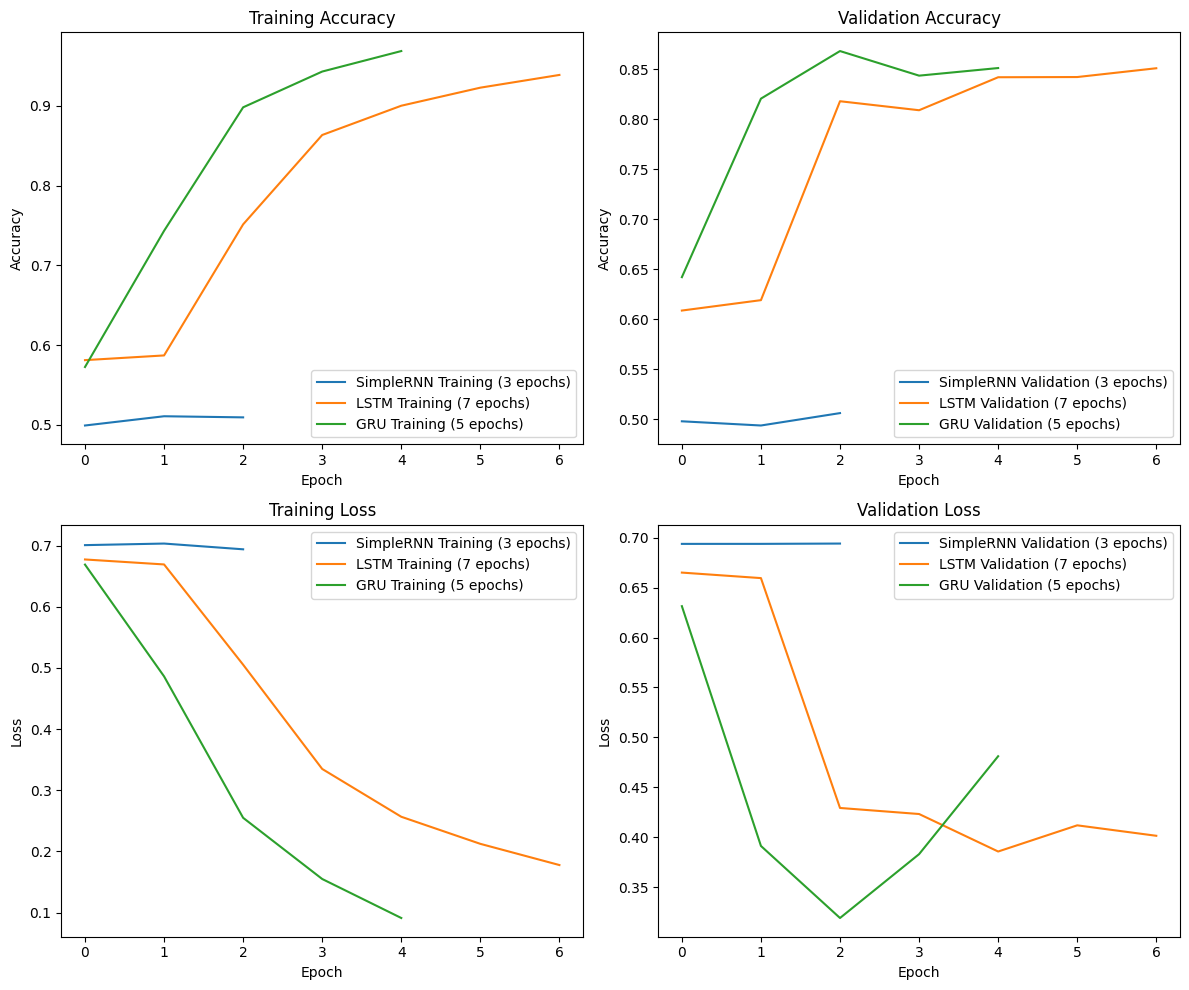

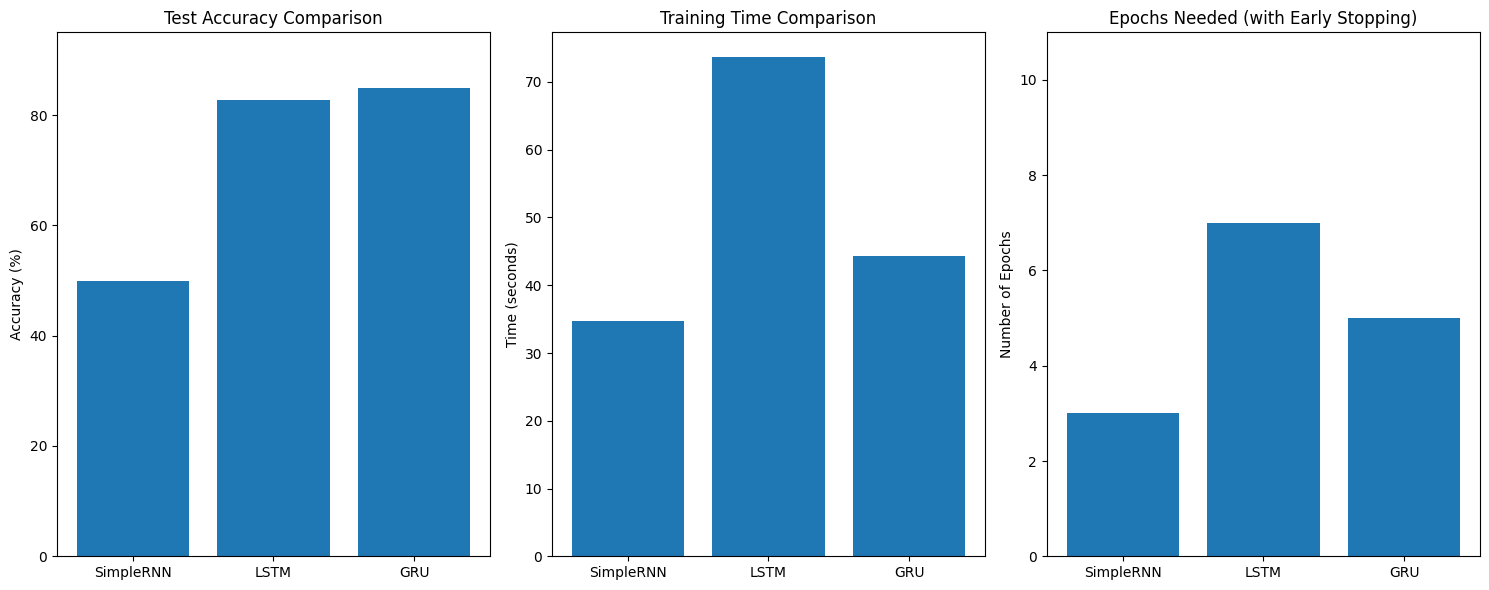


=== FINAL COMPARISON ===
Model      Test Accuracy   Test Loss  Training Time   Epochs    
-----------------------------------------------------------------
SimpleRNN  49.98          % 0.6939     34.68          s 3         
LSTM       82.75          % 0.4103     73.64          s 7         
GRU        84.96          % 0.3442     44.30          s 5         


In [35]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import time

# Load IMDB dataset
print("Loading IMDB dataset...")
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

# Set parameters
max_length = 150
embed_size = 128
vocabulary_size = 10000
batch_size = 64
epochs = 10

# Pad sequences
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

# Function to create models
def create_model(cell_type):
    model = Sequential()
    model.add(Embedding(vocabulary_size, embed_size, input_shape=[max_length]))

    if cell_type == 'SimpleRNN':
        model.add(SimpleRNN(128, return_sequences=True))
        model.add(SimpleRNN(128))
    elif cell_type == 'LSTM':
        model.add(LSTM(128, return_sequences=True))
        model.add(LSTM(128))
    elif cell_type == 'GRU':
        model.add(GRU(128, return_sequences=True))
        model.add(GRU(128))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

# Train and evaluate models
def train_and_evaluate(cell_type):
    print(f"\n=== Training {cell_type} model ===")
    model = create_model(cell_type)

    # Add early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',      # Monitor validation loss
        patience=2,              # Stop after 2 epochs with no improvement
        min_delta=0.001,         # Minimum change to qualify as improvement
        restore_best_weights=True,  # Restore model weights from the epoch with the best value
        verbose=1                # Print messages
    )

    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=1,
        callbacks=[early_stopping]  # Add the early stopping callback
    )
    training_time = time.time() - start_time

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    print(f"{cell_type} Results:")
    print(f"- Test accuracy: {test_acc*100:.2f}%")
    print(f"- Test loss: {test_loss:.4f}")
    print(f"- Training time: {training_time:.2f} seconds")
    print(f"- Stopped after {len(history.history['loss'])} epochs")

    return {
        'history': history.history,
        'test_acc': test_acc,
        'test_loss': test_loss,
        'training_time': training_time,
        'epochs_completed': len(history.history['loss'])
    }

# Train all three models
results = {}
for cell_type in ['SimpleRNN', 'LSTM', 'GRU']:
    results[cell_type] = train_and_evaluate(cell_type)

# Plot training history comparison
plt.figure(figsize=(12, 10))

# Plot training & validation accuracy
plt.subplot(2, 2, 1)
for cell_type in results:
    epochs_completed = results[cell_type]['epochs_completed']
    plt.plot(results[cell_type]['history']['accuracy'], label=f'{cell_type} Training ({epochs_completed} epochs)')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
for cell_type in results:
    epochs_completed = results[cell_type]['epochs_completed']
    plt.plot(results[cell_type]['history']['val_accuracy'], label=f'{cell_type} Validation ({epochs_completed} epochs)')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(2, 2, 3)
for cell_type in results:
    epochs_completed = results[cell_type]['epochs_completed']
    plt.plot(results[cell_type]['history']['loss'], label=f'{cell_type} Training ({epochs_completed} epochs)')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 4)
for cell_type in results:
    epochs_completed = results[cell_type]['epochs_completed']
    plt.plot(results[cell_type]['history']['val_loss'], label=f'{cell_type} Validation ({epochs_completed} epochs)')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('rnn_lstm_gru_comparison.png')
plt.show()

# Bar chart comparing test accuracy and epochs needed
plt.figure(figsize=(15, 6))
cell_types = list(results.keys())
test_accuracies = [results[cell_type]['test_acc'] * 100 for cell_type in cell_types]
training_times = [results[cell_type]['training_time'] for cell_type in cell_types]
epochs_completed = [results[cell_type]['epochs_completed'] for cell_type in cell_types]

plt.subplot(1, 3, 1)
plt.bar(cell_types, test_accuracies)
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim([0, 95])  # Adjust based on your results

plt.subplot(1, 3, 2)
plt.bar(cell_types, training_times)
plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')

plt.subplot(1, 3, 3)
plt.bar(cell_types, epochs_completed)
plt.title('Epochs Needed (with Early Stopping)')
plt.ylabel('Number of Epochs')
plt.ylim([0, epochs + 1])

plt.tight_layout()
plt.savefig('performance_comparison.png')
plt.show()

# Print final comparison summary
print("\n=== FINAL COMPARISON ===")
print(f"{'Model':<10} {'Test Accuracy':<15} {'Test Loss':<10} {'Training Time':<15} {'Epochs':<10}")
print('-' * 65)
for cell_type in results:
    print(f"{cell_type:<10} {results[cell_type]['test_acc']*100:<15.2f}% {results[cell_type]['test_loss']:<10.4f} {results[cell_type]['training_time']:<15.2f}s {results[cell_type]['epochs_completed']:<10}")